# Exercise Set 3: Strings, requests and APIs

*Morning, August 13, 2019*

In this exercise set you will be working with collecting from the web. We will start out with some basic string operations and build on that to make a query for fetching data.

In addition to DataCamp, you might find [this page](https://pythonprogramming.net/string-concatenation-formatting-intermediate-python-tutorial/) on pythonprogramming.net useful. [This page](https://www.python-course.eu/python3_sequential_data_types.php) give an introduction to the basics of strings and their related data types. 

## Exercise Section 3.1: Basic string operations and dictionaries

Strings have multiple operations and functions associated. In this exercise we investigate a few of these. We also explore the sequence form of a string and how it can be sliced and accessed via indices.

> **Ex. 3.1.1**: Let `s1='Chameleon'` and `s2='ham'`. Check whether the string `s2` is a substring of `s1`. Is `'hello'` a substring `'goodbye'`?

> *Hint*: One string operation is to check whether a string `S` contains a substring `T`, this can be done with the `in` operator: `S in T`. 

In [1]:
# [Answer to Ex. 3.1.1]
s1 = 'Chameleon'
s2 = 'ham'
print(s2 in s1)
print('hello' in 'goodbye')

True
False


> **Ex. 3.1.2**: From the string `s1` select the last four characters. What is the index of the character `a` in `s1`?

> *Hint*: We can selecting a substring by slicing it with the `[]` notation, from the start to end where start is included and end is excluded. Recall that Python has zero-based indexing, see explanation [here](https://softwareengineering.stackexchange.com/questions/110804/why-are-zero-based-arrays-the-norm).


In [2]:
# [Answer to Ex. 3.1.2]
print(s1[-4:])
print(s1.index('a'))


leon
2


In addition to the techniques above strings are equipped with an array of _methods_, for solving more complex tasks. For example the `str.join(list)` method will insert a string in between each element of a list. Oppositely `str1.split(str2)` splits `str1` into a list. `.strip()` removes spaces in the beginning and end of a word and `.format()` fills in specified blanks in a string.  Below we illustrate the use of each function

```python
>>> ','.join(['a','b']) 
'a,b'

>>> ' Hello World! '.strip() 
'Hello World!'

>>> 'Hello {w}'.format(w='World!') 
'Hello World!'

>>> 'a,b,c'.split(',') 
['a','b','c']
```

> **Ex. 3.1.3:** Let `l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']`. Create from `l1` the sentence "Is r > g?" using your knowledge about string formatting. Make sure there is only one space in between worlds.
>
>> _Hint:_ You should be able to combine the above informations to solve this exercise.

In [3]:
# [Answer to Ex. 3.1.3]
l1 = ['r ', 'Is', '>', ' < ', 'g ', '?']
print('"{} {} {} {} {}"'.format(l1[1], l1[0].strip(), l1[2], l1[4].strip(), l1[-1]))

"Is r > g ?"


### Dictionaries

Dictionaries (or simply dicts) are a central building block of python. Python dicts are constructed from pairs of keys and values making them extremely versatile for data storage. Furthermore dicts correspond directly to the json file format.  

> **Ex. 3.1.4**: Create an empty dictionary `words` using the `dict()`function. Then add each of the words in `['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']` as a key, with the value being a boolean indicator for whether the word begins with a vowel. The results should look like `{'bacon': False, 'asynchronous': True ...}`
>
>> _Hint:_ You might want co first construct a function that asseses whether a given word begins with a vowel or not.

In [4]:
# [Answer to Ex. 3.1.4]
def starts_with_vowel(word: str) -> bool:
    return word[0] in 'aeiouy'

word_list = ['animal', 'coffee', 'python', 'unit', 'knowledge', 'tread', 'arise']
bool_list = [starts_with_vowel(w) for w in word_list]
words = dict(zip(word_list, bool_list))
print(str(words))


{'animal': True, 'coffee': False, 'python': False, 'unit': True, 'knowledge': False, 'tread': False, 'arise': True}


> **Ex. 3.1.5:** Loop through the dictionary `words`. In each iteration you should print a proper sentence stating if the current word begins with a vowel or not. 

> _Hint:_ You can loop through both keys and values simultaneously with the `.items()` method. [This](https://www.tutorialspoint.com/python/python_dictionary.htm) might help you.

In [5]:
# [Answer to Ex. 3.1.5]

def ppbool(b: bool) -> str:
    return 'yes' if b else 'no'

def gen_sentence(k,v) -> str:
    return "Does {} begins with a vowel: {}".format(k, ppbool(v))

# Printed in increasing order of complexity
# Using for-loop
for k,v in words.items():
    print(gen_sentence(k,v))

print()

# Using join and list comprehension
print('\n'.join((gen_sentence(k,v) for k,v in words.items())))

print()

# Using join and map
print('\n'.join(map(gen_sentence, *zip(*words.items()))))

print()

# A rewritten edition of this would be
keys, values = zip(*words.items())
print('\n'.join(map(gen_sentence, keys, values)))

Does animal begins with a vowel: yes
Does coffee begins with a vowel: no
Does python begins with a vowel: no
Does unit begins with a vowel: yes
Does knowledge begins with a vowel: no
Does tread begins with a vowel: no
Does arise begins with a vowel: yes

Does animal begins with a vowel: yes
Does coffee begins with a vowel: no
Does python begins with a vowel: no
Does unit begins with a vowel: yes
Does knowledge begins with a vowel: no
Does tread begins with a vowel: no
Does arise begins with a vowel: yes

Does animal begins with a vowel: yes
Does coffee begins with a vowel: no
Does python begins with a vowel: no
Does unit begins with a vowel: yes
Does knowledge begins with a vowel: no
Does tread begins with a vowel: no
Does arise begins with a vowel: yes

Does animal begins with a vowel: yes
Does coffee begins with a vowel: no
Does python begins with a vowel: no
Does unit begins with a vowel: yes
Does knowledge begins with a vowel: no
Does tread begins with a vowel: no
Does arise begins

<br>

## Exercise Section 3.2: The punk API
The [punk API](https://punkapi.com/) serves information about _beers_. It is a well made and well documented API which makes it great for learning about APIs. 

> **Ex. 3.2.1:** Read the documentation on the Punk API available [here](https://punkapi.com/documentation/v2). What is the server url (i.e. root endpoint) of the Punk API? Does it require authentication? Then use the Punk API to make a request for beers brewed before December, 2008 with an ABV of at least 8.

In [6]:
# [Answer to Ex. 3.2.1]
import requests
import json

root_endpoint = 'https://api.punkapi.com/v2/'
# Authentication no
# Relies on rate limit, by allowing a maximum of 3600 reqs per hour per IP

request_url = root_endpoint + '/beers?brewed_before=12-2008&abv_gt=8'

response = requests.get(request_url)

beer_dct = json.loads(response.text)
print(json.dumps(beer_dct, indent=2, sort_keys=True))

[
  {
    "abv": 12.5,
    "attenuation_level": 81.2,
    "boil_volume": {
      "unit": "litres",
      "value": 25
    },
    "brewers_tips": "Rack into a secondary fermenter and add your strawberries. Use a blow-off rather than an airlock as the fermentation can get pretty wild as the yeast starts using the sugar from the strawberries.",
    "contributed_by": "Sam Mason <samjbmason>",
    "description": "A 9.2% Double IPA aged for 21 months in a 1965 Invergordon cask with 30 kg of fresh highland strawberries. This beer is a riot of whisky, caramel and strawberry, all tempered by a toe curling bitterness enducing rapture in all who taste it. Who needs champagne?",
    "ebc": 40,
    "first_brewed": "10/2008",
    "food_pairing": [
      "Poached eggs and smoked salmon",
      "Salt and pepper squid",
      "Key Lime Pie"
    ],
    "ibu": 125,
    "id": 37,
    "image_url": "https://images.punkapi.com/v2/37.png",
    "ingredients": {
      "hops": [
        {
          "add": "start"

> **Ex. 3.2.2:** What object type is the API's JSON response? What about the individual items in the container? Convert the response object to a suitable format and answer the following questions:
>> 1) How many beers are in the JSON object?
>>
>> 2) Print the names of the beers in the JSON object using lower case characters.
>>
>> 3) Select the beer called Paradox Islay from the JSON object.
>>
>> 4) Which hop ingredients does the Paradox Islay contain?


In [7]:
# [Answer to Ex. 3.2.2]
print("Length of the beer dictionary: {}".format(str(len(beer_dct))))
print("Names of beers in lower case:")
print('\n'.join(beer['name'].lower() for beer in beer_dct))

paradox_beer_list = list(filter(lambda beer: beer['name'].lower().startswith('paradox'), beer_dct))
paradox_beer = paradox_beer_list[0]
#print(str(list(paradox_beer)))
hobs_gen = (hop['name'] for hop in paradox_beer['ingredients']['hops'])
print("Hops in Paradox: {}".format(', '.join(hobs_gen)))

Length of the beer dictionary: 4
Names of beers in lower case:
zephyr
paradox islay
coffee imperial stout
ab:03
Hops in Paradox: Columbus, Columbus, Saaz, First Gold


> **Ex. 3.2.3:** Save the beers as a JSON file on your machine.

> _Hint:_ you might want to take a look at the [json](https://docs.python.org/3/library/json.html) module.


In [8]:
# [Answer to Ex. 3.2.3]
with open('beer_data.json', 'w') as f:
    json.dump(beer_dct, f)

<br>

## Exercise Section 3.3: The DST API

DST (Statistics Denmark) provide an API access to their aggregate data. For developers they supply a [console](https://api.statbank.dk/console) for testing. In this exercise we will first code up a simple script which can collect data from the DST API, and then introduce the [PyDST](https://kristianuruplarsen.github.io/PyDST/) package. 

> **Ex 3.3.1:** Use the API console to construct a GET request which retrieves the table FOLK1A split by quarter. The return should be in JSON format. We want all available dates.
>
>Then write a function `construct_link()` which takes as inputs: a table ID (e.g. `'FOLK1A'`) and a list of strings like `['var1=*', 'var2=somevalue']`. The function should return the proper URL for getting a dataset with the specified variables (e.g. in this case all levels of var1, but only where var2=somevalue).

> _Hint:_ The time variable is called 'tid'. To select all available values, set the value-id to '*'. Spend a little time with the console to get a sense of how the URLs are constructed.


In [9]:
# [Answer to Ex. 3.3.1]
from typing import List
import urllib 
from codecs import decode

def construct_link(table: str, variables: List[str]) -> str:
    #url = '&'.join([urllib.parse.quote_plus(vpair) for vpair in variables])
    url = '&'.join(variables)
    return 'https://api.statbank.dk/v1/data/{}/CSV?{}'.format(table, url)
    
#print(construct_link(['tid=*', 'timeOrder=Ascending']))

dst_response = requests.get(construct_link('folk1a', ['køn=*', 'tid=*']))

#print(dst_response.text)
#print(json.loads(decode(dst_response.text, 'utf-8-sig')))
dst_data = (dst_response.content.decode('utf-8-sig'))
print(dst_data)

KØN;TID;INDHOLD
I alt;2008K1;5475791
I alt;2008K2;5482266
I alt;2008K3;5489022
I alt;2008K4;5505995
I alt;2009K1;5511451
I alt;2009K2;5515287
I alt;2009K3;5519441
I alt;2009K4;5532531
I alt;2010K1;5534738
I alt;2010K2;5540241
I alt;2010K3;5543819
I alt;2010K4;5557709
I alt;2011K1;5560628
I alt;2011K2;5564219
I alt;2011K3;5566856
I alt;2011K4;5579204
I alt;2012K1;5580516
I alt;2012K2;5584758
I alt;2012K3;5587085
I alt;2012K4;5599665
I alt;2013K1;5602628
I alt;2013K2;5605836
I alt;2013K3;5608784
I alt;2013K4;5623501
I alt;2014K1;5627235
I alt;2014K2;5634437
I alt;2014K3;5639719
I alt;2014K4;5655750
I alt;2015K1;5659715
I alt;2015K2;5668743
I alt;2015K3;5678348
I alt;2015K4;5699220
I alt;2016K1;5707251
I alt;2016K2;5717014
I alt;2016K3;5724456
I alt;2016K4;5745526
I alt;2017K1;5748769
I alt;2017K2;5756170
I alt;2017K3;5760694
I alt;2017K4;5778570
I alt;2018K1;5781190
I alt;2018K2;5785864
I alt;2018K3;5789957
I alt;2018K4;5806015
I alt;2019K1;5806081
I alt;2019K2;5811413
I alt;2019K3;58144

When executing the request in the console you should get a json file as output. Next lets write some code to load these json files directly into python. 


> **Ex. 3.3.2:** use the `requests` module (get it with `pip install requests`) and `construct_link()` to request birth data from the "FOD" table. Get all available years (variable "Tid"), but only female births (BARNKON=P) . Unpack the json payload and store the result. Wrap the whole thing in a function which takes an url as input and returns the corresponding output.

> _Hint:_ The `requests.response` object has a `.json()` method. 

In [10]:
# [Answer to Ex. 3.3.2]
import pandas as pd

def download_as_json(url, colnames):
    dst_resp = pd.read_csv(url, sep=';')
    dst_resp.columns = colnames
    return dst_resp

#dst_births = requests.get(construct_link('fod', ['tid=*', 'barnkon=p']))

birth_count_years = download_as_json(construct_link('fod', ['tid=*', 'barnkon=*']), colnames=['Year', 'Sex', 'BirthCount'])


print(birth_count_years)

    Year     Sex  BirthCount
0   1973  Drenge       36899
1   1973   Piger       34996
2   1974  Drenge       36556
3   1974   Piger       34771
4   1975  Drenge       36811
5   1975   Piger       35260
6   1976  Drenge       33734
7   1976   Piger       31533
8   1977  Drenge       31823
9   1977   Piger       30055
10  1978  Drenge       31875
11  1978   Piger       30161
12  1979  Drenge       30555
13  1979   Piger       28909
14  1980  Drenge       29352
15  1980   Piger       27941
16  1981  Drenge       27117
17  1981   Piger       25972
18  1982  Drenge       27063
19  1982   Piger       25595
20  1983  Drenge       26001
21  1983   Piger       24821
22  1984  Drenge       26572
23  1984   Piger       25228
24  1985  Drenge       27465
25  1985   Piger       26284
26  1986  Drenge       28434
27  1986   Piger       26878
28  1987  Drenge       29079
29  1987   Piger       27142
..   ...     ...         ...
62  2004  Drenge       33070
63  2004   Piger       31539
64  2005  Dren

> **Ex. 3.3.3:** Extract the number of girls born each year. Store the results as a list.

In [11]:
# [Answer to Ex. 3.3.3]

female_births = birth_count_years[birth_count_years['Sex'] == 'Piger']['BirthCount'].copy()
male_births = birth_count_years[birth_count_years['Sex'] == 'Drenge']['BirthCount'].copy()

print(female_births.head())
print(male_births.head())

1    34996
3    34771
5    35260
7    31533
9    30055
Name: BirthCount, dtype: int64
0    36899
2    36556
4    36811
6    33734
8    31823
Name: BirthCount, dtype: int64


> **Ex.3.3.4:** Repeat 3.3.2 and 3.3.3 but this time only get boy births (BARNKON=D). Store the numbers in a new list and use the `plot_births` (supplied below) function to plot the data. If you don't already have matplotlib installed run `pip install matplotlib`.

In [12]:
# Just run this once, do not change it.
import matplotlib.pyplot as plt 

def plot_births(boys, girls):
    """ Plots lineplot of the number of births split by gender.
    
    Args: 
        boys: a list of boy births by year
        girls: a list of girl births by year
    """
    if not len(boys) == len(girls):
        raise ValueError('There must be the same number of observations for boys and girls')
    
    labels = ['{y}'.format(y=year) for year in range(1973,2018)]
    
    plt.plot(range(len(boys)), boys, color = 'blue', label = 'boys')
    plt.plot(range(len(boys)), girls, color = 'red', label = 'girls')
    plt.xticks([i for i in range(len(boys)) if i%4 == 0], [l for i,l in zip(range(len(boys)),labels) if i%4 == 0],
               rotation = 'vertical')
    plt.legend()
    plt.show()

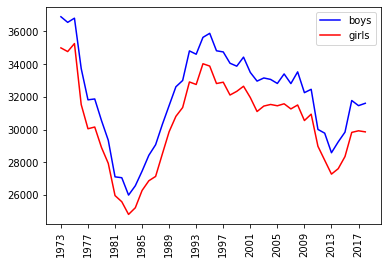

In [13]:
# [Answer to Ex. 3.3.4]

plot_births(male_births, female_births)

>**(Bonus question) Ex. 3.3.5:** Go to [https://kristianuruplarsen.github.io/PyDST/](https://kristianuruplarsen.github.io/PyDST/) follow the installation instructions and import PyDST. Try to replicate the birth figure from 3.3.4 using PyDST. Use [the documentation](https://kristianuruplarsen.github.io/PyDST/connection) to learn how the package works.

> _Hint:_ PyDST does not use json or dicts as its primary data format, instead it uses pandas DataFrames. When you install PyDST it will install pandas as a dependency. If this doesn't work simply run `pip install pandas` in your console. DataFrames are very intuitive to work with, for example accessing a column named 'name' is simply `data['name']` or `data.name`.
>
> In the next session you will learn more about pandas and DataFrames. If you are more comfortable with dicts, the data_response class has a `.dict` method you can use. 

In [14]:
# [Answer to Ex. 3.3.5]